In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msgn

pd.options.display.max_columns = 200

data = pd.read_csv('No_Show_data_prepared.csv')


In [2]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Seeing if we can predict no-shows from the rest of the data using logistic regression classifier. 
# We are excluding Neighbourhood as it produced too many dummy columns to include in the model.

y = data['No-show']
X = data.drop(['No-show', 'Neighbourhood'], axis=1)
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [3]:
# Checking the baseline

y_test.value_counts(normalize=True)

0    0.79866
1    0.20134
Name: No-show, dtype: float64

In [4]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7980264349085642

In [5]:
# We can see that the logistic regression model performs at essentially baseline.
# Let's try a different classification model.

In [6]:
# Trying using a KNN classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
y = data['No-show']
X = data.drop(['No-show', 'Neighbourhood'], axis=1)
X = pd.get_dummies(X, drop_first=True)
X = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

In [ ]:
# It was not possible to run the KNN classifier.

In [7]:
from sklearn.svm import LinearSVC
svc = LinearSVC()

In [8]:
y = data['No-show']
X = data.drop(['No-show', 'Neighbourhood'], axis=1)
X = pd.get_dummies(X, drop_first=True)
X = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7967137425312331

In [9]:
y_test.value_counts(normalize=True)

0    0.796985
1    0.203015
Name: No-show, dtype: float64

In [12]:
# The SVM also performs at baseline.
# None of these models was able to outperform baseline.
# We return to the EDA to see which features may be of most interest.

In [9]:
list(data.columns)

['Gender',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_received',
 'No-show',
 'ScheduledDay_dayofweek',
 'ScheduledDay_dayofmonth',
 'ScheduledDay_month',
 'ScheduledDay_timehour',
 'ScheduledDay_timeminute',
 'AppointmentDay_dayofweek',
 'AppointmentDay_dayofmonth',
 'AppointmentDay_month']

In [13]:
# It might be interesting to see if appointments at the weekend are more often no-shows 

In [14]:
data['ScheduledDay_dayofweek'].unique()

array(['Friday', 'Wednesday', 'Tuesday', 'Thursday', 'Monday', 'Saturday'],
      dtype=object)

In [15]:
data['Weekend?'] = data['ScheduledDay_dayofweek'].apply(lambda x: 1 if x=='Saturday' else 0)

In [16]:
data['Weekend?'].nunique()

2

In [17]:
data['Weekend?'].value_counts()

0    110435
1        24
Name: Weekend?, dtype: int64

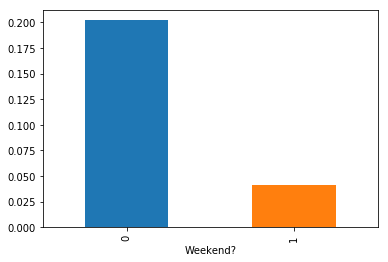

In [18]:
data.groupby('Weekend?')['No-show'].mean().plot.bar()

In [19]:
data.groupby('Weekend?')['No-show'].mean()

Weekend?
0    0.201893
1    0.041667
Name: No-show, dtype: float64

In [20]:
from scipy.stats import ttest_ind
x = data[data['Weekend?']==1]['No-show']
y = data[data['Weekend?']==0]['No-show']

ttest_ind(x, y, equal_var=False)

Ttest_indResult(statistic=-3.8438054985076606, pvalue=0.0008265385023729408)

In [21]:
# In fact, we find that at the weekend people are less likely to be no-shows.
# Let's look next at patient-features.

In [22]:
tmp = ['Gender','Hypertension','Alcoholism','Diabetes', 'Handicap', 'Scholarship']
for i in tmp:
    print(data.groupby(i)['No-show'].mean())

Gender
0    0.203095
1    0.199560
Name: No-show, dtype: float64
Hypertension
0    0.209023
1    0.172636
Name: No-show, dtype: float64
Alcoholism
0    0.201869
1    0.201488
Name: No-show, dtype: float64
Diabetes
0    0.203541
1    0.180111
Name: No-show, dtype: float64
Handicap
0    0.202317
1    0.176991
2    0.202186
3    0.230769
4    0.333333
Name: No-show, dtype: float64
Scholarship
0    0.197986
1    0.237380
Name: No-show, dtype: float64


In [23]:
for i in tmp:
    
    x = data[data[i]==1]['No-show']
    y = data[data[i]==0]['No-show']
    
    print(ttest_ind(x, y, equal_var=False))
    print()

Ttest_indResult(statistic=-1.3988511105167594, pvalue=0.16186153104925347)

Ttest_indResult(statistic=-12.531780390172017, pvalue=5.9719492708446794e-36)

Ttest_indResult(statistic=-0.054235161789887444, pvalue=0.9567508388116163)

Ttest_indResult(statistic=-5.213555390039917, pvalue=1.892218820349028e-07)

Ttest_indResult(statistic=-2.9613392431787866, pvalue=0.003097099383515635)

Ttest_indResult(statistic=9.216091755420047, pvalue=3.5485277161526014e-20)



In [24]:
# We can see from this that handicap status significantly affects whether a person shows up.
# Let's explore this further.

In [25]:
data['Handicap'].describe()

count    110459.000000
mean          0.022189
std           0.161377
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: Handicap, dtype: float64

In [26]:
data['Handicap'].value_counts()

0    108226
1      2034
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [27]:
data['Handicap_1'] = data['Handicap'].apply(lambda x: 1 if x==1 else 0)
data['Handicap_2'] = data['Handicap'].apply(lambda x: 1 if x==2 else 0)
data['Handicap_3'] = data['Handicap'].apply(lambda x: 1 if x==3 else 0)
data['Handicap_4'] = data['Handicap'].apply(lambda x: 1 if x==4 else 0)

In [28]:
lr = LogisticRegression()

y = data['No-show']
X = data[['Handicap']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [29]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7948578671012131

In [30]:
y_test.value_counts(normalize=True)

0    0.794858
1    0.205142
Name: No-show, dtype: float64

In [31]:
# This did not outperform baseline.
# It might be interesting to see if level of handicap is also a factor.

In [32]:
level_of_handicap = ['Handicap_1', 'Handicap_2', 'Handicap_3', 'Handicap_4']
for i in level_of_handicap:
    print(data.groupby(i)['No-show'].mean())

Handicap_1
0    0.202324
1    0.176991
Name: No-show, dtype: float64
Handicap_2
0    0.201857
1    0.202186
Name: No-show, dtype: float64
Handicap_3
0    0.201854
1    0.230769
Name: No-show, dtype: float64
Handicap_4
0    0.201854
1    0.333333
Name: No-show, dtype: float64


In [33]:
for i in level_of_handicap:
    
    x = data[data[i]==1]['No-show']
    y = data[data[i]==0]['No-show']
    
    print(ttest_ind(x, y, equal_var=False))
    print()

Ttest_indResult(statistic=-2.962190691488796, pvalue=0.0030885855018321076)

Ttest_indResult(statistic=0.011029714288401715, pvalue=0.9912117808781907)

Ttest_indResult(statistic=0.23772458361099852, pvalue=0.8161043795484904)

Ttest_indResult(statistic=0.3944350151792318, pvalue=0.7313450054071748)



In [34]:
lr = LogisticRegression()

y = data['No-show']
X = data[['Handicap_1', 'Handicap_2', 'Handicap_3', 'Handicap_4']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [35]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7972116603295311

In [36]:
y_test.value_counts(normalize=True)

0    0.797212
1    0.202788
Name: No-show, dtype: float64

In [44]:
# We can look at our model's confidence. Here we see that the model performs similarly on all entries.

In [45]:
y_proba = lr.predict_proba(X_test)
print(y_proba)

[[0.79784444 0.20215556]
 [0.79784444 0.20215556]
 [0.79784444 0.20215556]
 ...
 [0.79784444 0.20215556]
 [0.79784444 0.20215556]
 [0.79784444 0.20215556]]


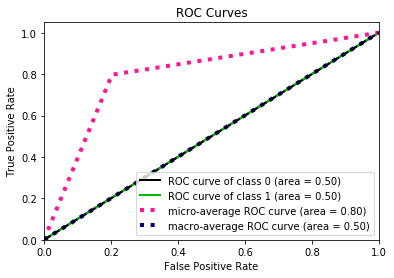

In [46]:
from scikitplot.metrics import plot_roc

plot_roc(y_test, y_proba)

In [47]:
# Let's move to the tree classifiers.

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtc = DecisionTreeClassifier()

In [49]:
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.7972116603295311

In [50]:
# The decision tree performs at baseline.

In [51]:
rfc = RandomForestClassifier(n_estimators=200)

In [52]:
rfc.fit(X_train, y_train).score(X_test, y_test)

0.7972116603295311

In [53]:
y_train.value_counts(normalize=True)

0    0.798375
1    0.201625
Name: No-show, dtype: float64

In [54]:
# The ensemble model performs similarly.
# It might be the fact that the class imbalance is so large. We can force the model to use the same number of data items from each of the no-show conditions
# in the X_train and y_train.

In [55]:
y_train_0 = y_train[y_train==0].sample(17000)
y_train_1 = y_train[y_train==1].sample(17000)

X_train_0 = X_train.loc[y_train_0.index]
X_train_1 = X_train.loc[y_train_1.index]

X_train_balanced = pd.concat([X_train_0, X_train_1])
y_train_balanced = pd.concat([y_train_0, y_train_1])

In [56]:
lr.fit(X_train_balanced, y_train_balanced)
lr.score(X_test, y_test)

0.21410465326815137

In [44]:
dtc.fit(X_train_balanced, y_train_balanced)
dtc.score(X_test, y_test)

0.21070975918884663

In [45]:
rfc.fit(X_train_balanced, y_train_balanced)
rfc.score(X_test, y_test)

0.21070975918884663

In [57]:
# To be continued...